<a href="https://colab.research.google.com/github/nascimento-luciano/artificial-intelligence-and-visual-computing/blob/main/2.Consolidando_o_conhecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

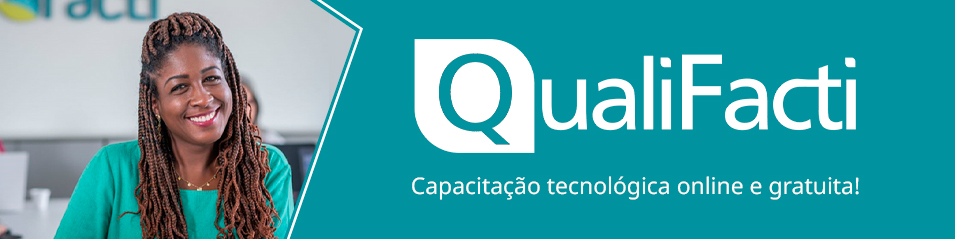

# **Inteligência Artificial aplicada à Visão Computacional**

**Capítulo 1: Python para desenvolvimento de Inteligência Artificial: do básico às aplicações avançadas**

Elaborado por: Adriana Silva e Larissa de Oliveira


<p align="justify">

Todos os direitos reservados à Facti, 2023
<p>

[www.qualifacti.com.br](https://)

---

<p align="justify">
É importante esclarecer que este exemolo não compõe a avaliação e não haverá correção formal por parte dos instrutores; o objetivo é a autoaprendizagem e prática.
<p>

---

# **ETAPA CONSOLIDAR**

---

# **Preparação dos Dados**

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf

# Carregar dados do MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Inspecionar a forma dos dados
print("Forma dos dados de treino:", train_images.shape)
print("Forma dos dados de teste:", test_images.shape)

# Normalização
train_images = train_images / 255.0
test_images = test_images / 255.0

# Remodelagem para adicionar o canal de cor
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))


11490434/11490434 [==============================] - 0s 0us/step
Forma dos dados de treino: (60000, 28, 28)
Forma dos dados de teste: (10000, 28, 28)


# **Construção de Modelo com TensorFlow**

## Desenvolvimento do Modelo

In [ ]:
# Construção do modelo
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model_tf.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


## Treinamento e Avaliação

In [ ]:
# Treinamento do modelo
history_tf = model_tf.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avaliação do modelo
test_loss, test_acc = model_tf.evaluate(test_images, test_labels)
print("Acurácia TensorFlow: ", test_acc
      )

Epoch 1/10
1500/1500 [==============================] - 50s 31ms/step - loss: 0.1760 - accuracy: 0.9471 - val_loss: 0.0682 - val_accuracy: 0.9803
Epoch 2/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 3/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0599 - val_accuracy: 0.9835
Epoch 4/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0571 - val_accuracy: 0.9846
Epoch 6/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0532 - val_accuracy: 0.9864
Epoch 7/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0550 -

# **Métricas importantes**

In [ ]:
# Histórico de treinamento do TensorFlow
acc_tf = history_tf.history['accuracy']
val_acc_tf = history_tf.history['val_accuracy']
loss_tf = history_tf.history['loss']
val_loss_tf = history_tf.history['val_loss']

print("Acurácia de Treinamento TensorFlow: ", acc_tf[-1])
print("Acurácia de Validação TensorFlow: ", val_acc_tf[-1])
print("Perda de Treinamento TensorFlow: ", loss_tf[-1])
print("Perda de Validação TensorFlow: ", val_loss_tf[-1])


Acurácia de Treinamento TensorFlow:  0.9982916712760925
Acurácia de Validação TensorFlow:  0.9870833158493042
Perda de Treinamento TensorFlow:  0.004689128138124943
Perda de Validação TensorFlow:  0.06334193795919418


# **Análise gráfica**

## Exibindo a acurácia ao longo treino/teste.

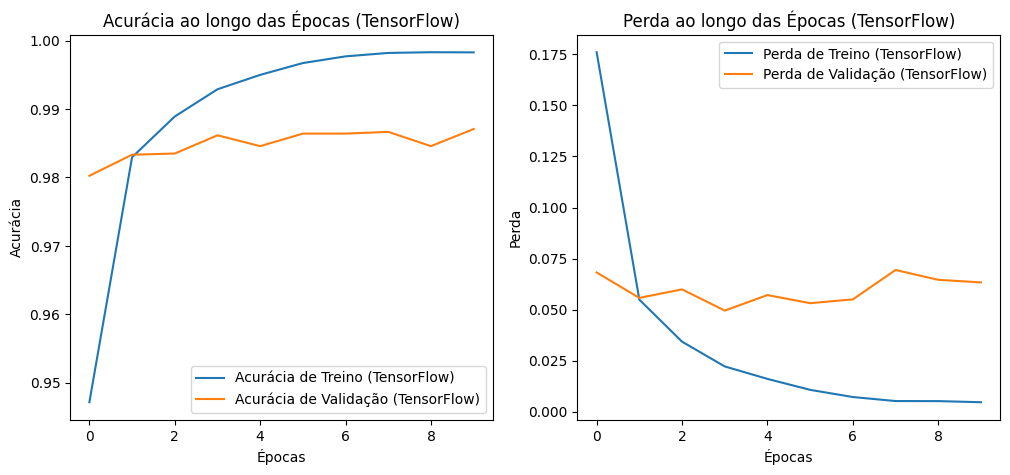

In [ ]:
import matplotlib.pyplot as plt


# TensorFlow - Acurácia e Perda
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_tf.history['accuracy'], label='Acurácia de Treino (TensorFlow)')
plt.plot(history_tf.history['val_accuracy'], label='Acurácia de Validação (TensorFlow)')
plt.title('Acurácia ao longo das Épocas (TensorFlow)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tf.history['loss'], label='Perda de Treino (TensorFlow)')
plt.plot(history_tf.history['val_loss'], label='Perda de Validação (TensorFlow)')
plt.title('Perda ao longo das Épocas (TensorFlow)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()






## Exibindo a perda ao longo do treino/teste.

313/313 [==============================] - 4s 13ms/step


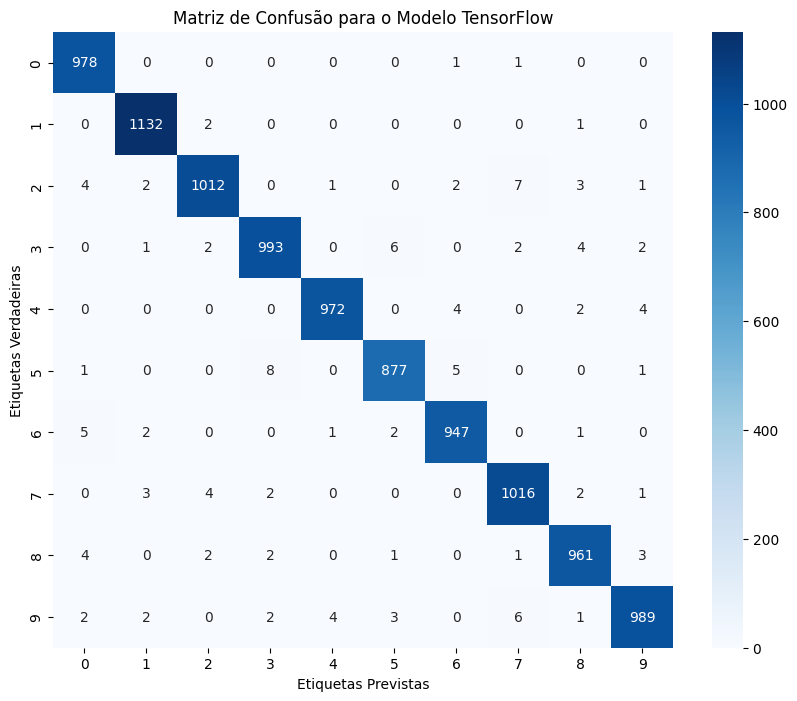

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Previsões com o modelo TensorFlow
predictions_tf = model_tf.predict(test_images)
predicted_labels_tf = np.argmax(predictions_tf, axis=1)

# Matriz de confusão
conf_matrix_tf = confusion_matrix(test_labels, predicted_labels_tf)

# Visualização com Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Etiquetas Previstas')
plt.ylabel('Etiquetas Verdadeiras')
plt.title('Matriz de Confusão para o Modelo TensorFlow')
plt.show()
